# The Impact of Artificial Intelligence on Forecasting Startup Success or Failure using Crunchbase Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:

!pip install scikit-learn


In [3]:
dataset=pd.read_csv(r"dataset.csv")
dataset

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [142]:
dataset.isnull().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [143]:
dataset.count()

permalink            66368
name                 66367
homepage_url         61310
category_list        63220
funding_total_usd    66368
status               66368
country_code         59410
state_code           57821
region               58338
city                 58340
funding_rounds       66368
founded_at           51147
first_funding_at     66344
last_funding_at      66368
dtype: int64

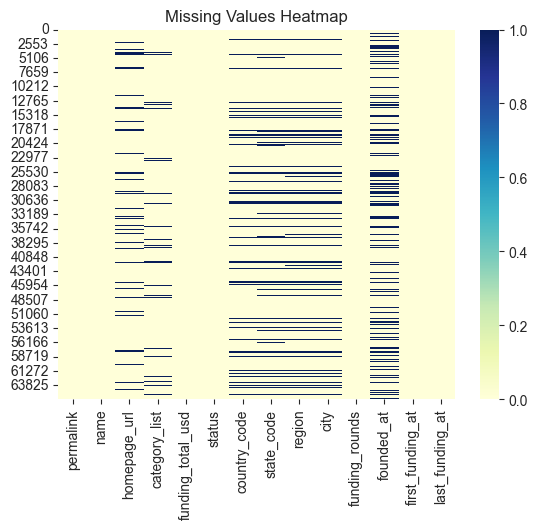

In [144]:
missing_values = dataset.isnull()

# Create the heatmap
sns.heatmap(missing_values, cmap='YlGnBu')

# Set plot title
plt.title('Missing Values Heatmap')

# Display the plot
plt.show()

Text(0, 0.5, 'Number of startups')

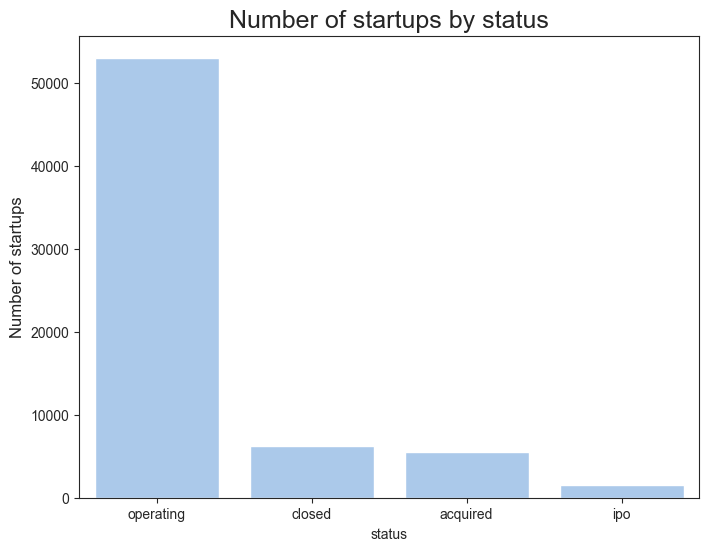

In [145]:
plt.figure(figsize=(8,6))
sns.barplot(x=dataset['status'].value_counts().index,y=dataset['status'].value_counts())
plt.title('Number of startups by status',size=18)
plt.ylabel('Number of startups',size=12)

In [146]:
#DEALING WITH NULL VALUES

In [4]:
# drop all rows with NA and any rows where funding_total_usd is '-'
startup = dataset.dropna().query("funding_total_usd != '-' ")
# Converting funding_total_usd to float
startup['funding_total_usd'] = startup['funding_total_usd'].astype(float)

# Formatting founded_at, first_funding_at, last_funding_at to datetime. If there are errors, convert it to NA
startup['founded_at'] = pd.to_datetime(startup['founded_at'], format='%Y-%m-%d', errors='coerce')
startup['first_funding_at'] = pd.to_datetime(startup['first_funding_at'], format='%Y-%m-%d', errors='coerce')
startup['last_funding_at'] = pd.to_datetime(startup['last_funding_at'], format='%Y-%m-%d', errors='coerce')

# drop the rows with NA to get the finally cleaned table
startup = startup.dropna()
startup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36549 entries, 1 to 66366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          36549 non-null  object        
 1   name               36549 non-null  object        
 2   homepage_url       36549 non-null  object        
 3   category_list      36549 non-null  object        
 4   funding_total_usd  36549 non-null  float64       
 5   status             36549 non-null  object        
 6   country_code       36549 non-null  object        
 7   state_code         36549 non-null  object        
 8   region             36549 non-null  object        
 9   city               36549 non-null  object        
 10  funding_rounds     36549 non-null  int64         
 11  founded_at         36549 non-null  datetime64[ns]
 12  first_funding_at   36549 non-null  datetime64[ns]
 13  last_funding_at    36549 non-null  datetime64[ns]
dtypes: datetime

In [5]:
startup['last_funding_at'] = startup['last_funding_at'].replace('21050501', '20150501')

In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36549 entries, 1 to 66366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          36549 non-null  object        
 1   name               36549 non-null  object        
 2   homepage_url       36549 non-null  object        
 3   category_list      36549 non-null  object        
 4   funding_total_usd  36549 non-null  float64       
 5   status             36549 non-null  object        
 6   country_code       36549 non-null  object        
 7   state_code         36549 non-null  object        
 8   region             36549 non-null  object        
 9   city               36549 non-null  object        
 10  funding_rounds     36549 non-null  int64         
 11  founded_at         36549 non-null  datetime64[ns]
 12  first_funding_at   36549 non-null  datetime64[ns]
 13  last_funding_at    36549 non-null  datetime64[ns]
dtypes: datetime

In [7]:
startup.to_csv('startup.csv')

In [8]:
startup_modeling = startup.query("status == 'acquired' or status == 'ipo' or status == 'closed'")

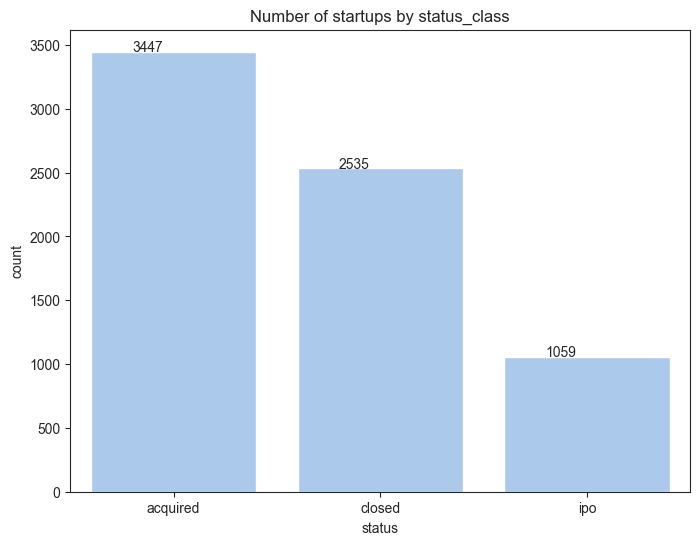

In [9]:
# plt.style.use('seaborn-pastel')
# plt.figure(figsize=(8,6))
# plt.title('Number of startups by status_class')
# sns.barplot(x= startup_modeling.status.value_counts().index, y=startup_modeling.status.value_counts())
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i-.20,y[i],y[i])

# addlabels(startup_modeling.status.value_counts().index,startup_modeling.status.value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style to ticks
sns.set_style("ticks")

# Set a light color palette
sns.set_palette("pastel")

plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')

# Using seaborn's barplot
sns.barplot(x=startup_modeling.status.value_counts().index, y=startup_modeling.status.value_counts())

# Function to add labels to bars
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i - 0.20, y[i], y[i])

# Add labels to bars
addlabels(startup_modeling.status.value_counts().index, startup_modeling.status.value_counts())

plt.show()


ERROR: Could not find a version that satisfies the requirement seaborn-pastel (from versions: none)
ERROR: No matching distribution found for seaborn-pastel


In [10]:
# Change 'acquired' and 'ipo' to 's', 'operating' and 'closed' to 'ns'.
startup_modeling['status'] = startup_modeling['status'].replace({'acquired':'s', 'ipo':'s', 'closed':'f'})

# Calculate the funding_period_year using last_funding_at and first_funding_at
startup_modeling['funding_period_year'] = (startup_modeling['last_funding_at'] - startup_modeling['first_funding_at']) / pd.Timedelta(days = 365.25)
startup_modeling['funding_period_year'] = startup_modeling['funding_period_year'].round(1)

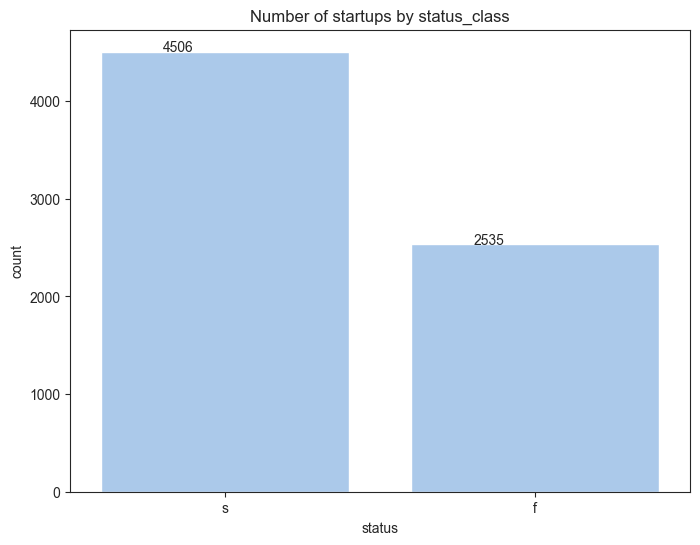

In [11]:
# plt.style.use('seaborn-pastel')
# plt.figure(figsize=(8,6))
# plt.title('Number of startups by status_class')
# sns.barplot(x= startup_modeling.status.value_counts().index, y=startup_modeling.status.value_counts())
# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i-.20,y[i],y[i])

# addlabels(startup_modeling.status.value_counts().index,startup_modeling.status.value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

# Set a pastel color palette
sns.set_palette("pastel")

plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')

# Using seaborn's barplot
sns.barplot(x=startup_modeling.status.value_counts().index, y=startup_modeling.status.value_counts())

# Function to add labels to bars
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i - 0.20, y[i], y[i])

# Add labels to bars
addlabels(startup_modeling.status.value_counts().index, startup_modeling.status.value_counts())

plt.show()


In [16]:
# 
# Having the features as funding_rounds, funding_period_year, funding_total_usd
X_id3 = startup_id3[['funding_rounds', 'funding_period_year', 'funding_total_usd']]

# The result will be the status
y_id3 = startup_id3['status']


In [18]:
# Having the features as funding_rounds, funding_period_year, funding_total_usd
X_id3 = startup_id3.iloc[:,1:]

# the result will be the status
y_id3 = startup_id3.iloc[:,0]

In [158]:
X_id3

,funding_rounds,funding_period_year,funding_total_usd
15,1,0.0,5000000.0
20,1,0.0,500000.0
23,2,1.1,2535000.0
31,2,0.1,1250000.0
32,1,0.0,35000000.0
...,...,...,...
66343,3,3.1,2257464.0
66349,2,0.8,3805520.0
66350,1,0.0,13000000.0
66352,9,4.1,866550786.0


In [19]:
y_id3

15       s
20       s
23       s
31       s
32       s
        ..
66343    f
66349    s
66350    s
66352    s
66358    f
Name: status, Length: 7041, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
X_train_id3, X_test_id3, y_train_id3, y_test_id3 = train_test_split(X_id3, y_id3, random_state = 42)

# DecisionTreeClassifier

In [21]:
# Create decision tree model and fit train model
from sklearn.tree import DecisionTreeClassifier
dt_id3 = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt_id3.fit(X_train_id3, y_train_id3)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [22]:
Y_pred=dt_id3.predict(X_test_id3)

In [23]:
Y_pred

array(['f', 'f', 's', ..., 's', 's', 'f'], dtype=object)

In [164]:
# Calculate accuracy
accuracy = accuracy_score(y_test_id3,Y_pred)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6882453151618398


[[363 254]
 [295 849]]


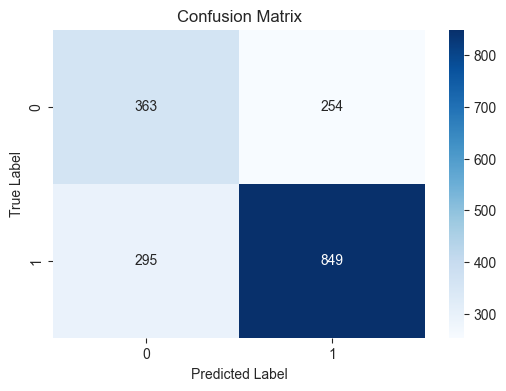

In [24]:
# confusion matrix
cm1 = confusion_matrix(y_test_id3,Y_pred)
print(cm1)
# Create the heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')

# Set plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

In [25]:
# Generate the classification report
classification_report1= classification_report(y_test_id3,Y_pred)

# Print the classification report
print("DecisionTreeClassifier classification_report:\n",classification_report1)

DecisionTreeClassifier classification_report:
               precision    recall  f1-score   support

           f       0.55      0.59      0.57       617
           s       0.77      0.74      0.76      1144

    accuracy                           0.69      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.69      0.69      0.69      1761



In [167]:
y_test_id3

15896    s
3960     s
1477     s
38679    s
34136    f
        ..
57820    s
27104    f
24893    s
41641    s
5896     s
Name: status, Length: 1761, dtype: object

# RandomForestClassifier

In [26]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'n_estimators': [200, 300],  # Number of trees in the forest
        'max_depth': [5, 10],  # Maximum depth of the tree
        'min_samples_split': [5, 10],  # Minimum number of samples required to split an internal node
    }
]

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_id3, y_train_id3)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [186]:
best_model 

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=200)

In [170]:
best_params 

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}

In [36]:
Y_pred1=grid_search.predict(X_test_id3)
Y_pred1

array(['f', 's', 's', ..., 's', 's', 's'], dtype=object)

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test_id3,Y_pred1)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7660420215786485


In [38]:
operating = startup.query("status == 'operating'")
operating['funding_period_year'] = (operating['last_funding_at'] - operating['first_funding_at']) / pd.Timedelta(days = 365.25)
operating['funding_period_year'] = operating['funding_period_year'].round(1)
operating

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_period_year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.6
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,0.3
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,2.8
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66357,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,2150000.0,operating,USA,NY,New York City,New York,2,2011-01-01,2013-07-26,2013-09-25,0.2
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600.0,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29,0.0
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000.0,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25,0.9
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,2.3


In [39]:
predict_set = operating[['funding_rounds', 'funding_period_year','funding_total_usd']]
predict_set
predicted_set =grid_search .predict(predict_set)




In [40]:
predict_set['status_predicted'] = predicted_set

In [41]:
predict_set

,funding_rounds,funding_period_year,funding_total_usd,status_predicted
1,2,0.6,700000.0,f
3,1,0.0,2000000.0,s
6,2,0.3,762851.0,f
7,4,2.8,33600000.0,s
8,3,2.5,1150050.0,s
...,...,...,...,...
66357,2,0.2,2150000.0,s
66361,1,0.0,2686600.0,s
66362,3,0.9,1120000.0,s
66364,4,2.3,114304.0,s


In [42]:
predict_set.groupby('status_predicted').agg({'status_predicted': 'count'}).rename(columns={'status_predicted': 'count'})

,count
status_predicted,
f,12546
s,16962


[[ 332  285]
 [ 127 1017]]


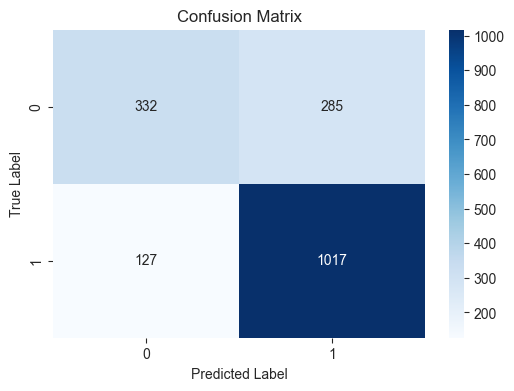

In [43]:

# confusion matrix
cm = confusion_matrix(y_test_id3,Y_pred1)
print(cm)
# Create the heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set plot title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

In [44]:
# Generate the classification report
report = classification_report(Y_pred1,y_test_id3)

# Print the classification report
print("RandomForestClassifierclassification report\n",report)

RandomForestClassifierclassification report
               precision    recall  f1-score   support

           f       0.54      0.72      0.62       459
           s       0.89      0.78      0.83      1302

    accuracy                           0.77      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.80      0.77      0.78      1761



In [45]:
y_test_id3

15896    s
3960     s
1477     s
38679    s
34136    f
        ..
57820    s
27104    f
24893    s
41641    s
5896     s
Name: status, Length: 1761, dtype: object

In [46]:
Y_pred1

array(['f', 's', 's', ..., 's', 's', 's'], dtype=object)

ERROR: Invalid requirement: 'Requirement already satisfied: pip in c:\\users\\dell xps\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (24.0)' (from line 1 of requirements.txt)
Hint: It looks like a path. File 'Requirement already satisfied: pip in c:\users\dell xps\appdata\local\programs\python\python312\lib\site-packages (24.0)' does not exist.
